<a href="https://colab.research.google.com/github/tuankhoin/COMP30027-Practical-Solutions/blob/main/COMP90049/Week%2010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### The University of Melbourne, School of Computing and Information Systems
# COMP90049 Intro to Machine Learning

## Week 10 - Unsupervised learning

---

## Theoretical Questions

## 1. Consider the following dataset:

id|apple|ibm|lemon|sun|label
-|-|-|-|-|-
A|4|0|1|1|fruit
B|5|0|5|2|fruit
C|2|5|0|0|comp
D|1|2|1|7|comp
E|2|0|3|1|?
F|1|0|1|0|?

### I. Treat the problem as an unsupervised machine learning problem (excluding the id and label attributes) and calculate the clusters according to (hard) k-means with k = 2, using the Manhattan distance, and instances A and F as the seeds.

Let's set initial centroids to $C_1=(4,0,1,1)$ and $C_2=(1,0,1,0)$

d|A|B|C|D|E|F
-|-|-|-|-|-|-
C1|0|6|9|11|4|4
C2|4|10|7|9|4|0
Closest centroid|1|1|2|2|Tie|2|

We can either set E to belong to cluster 1 or 2. Assume $E \in C_2$:

New centroid:
- $C_1 = \frac{1}{2} \times (4+5, 0+0, 1+5, 1+2) = (4.5,\;0,\;3,\;1.5)$
- $C_2 = \frac{1}{4} \times (2+1+2+1, 5+2+0+0, 0+1+3+1, 0+7+1+0) = (1.5,\;1.75,\;1.25,\;2)$

d|A|B|C|D|E|F
-|-|-|-|-|-|-
C1|3|3|12|13|3|7
C2|5.5|9|7|6|5|4.5
Closest centroid|1|1|2|2|1|2|

Can you try another round?

New centroid:
- $C_1 = (0.67,\;0,\;3,\;1.33)$
- $C_2 = (1.33,\;2.33,\;0.67,\;2.33)$

d|A|B|C|D|E|F
-|-|-|-|-|-|-
C1|2.67|4|11|12.33|2|6
C2|6.67|10.67|6.33|5.67|6.67|5.33
Closest centroid|1|1|2|2|1|2|

Centroid assignment is the same as previous ▶ Stop iterating

### II. Perform agglomerative clustering of the above dataset (excluding the id and label attributes), using the Euclidean distance and calculating the group average as the cluster centroid.

First, get all pairwise distances:

|$d^2$|A|B|C|D|E|F|
|---|---|---|---|---|---|---|
A|0|18|31|49|8|10
B||0|63|61|14|36
C|||0|60|35|27
D||||0|45|53
E|||||0|6
F||||||0

Smallest distance is E-F ▶ Merge E,F to EF with centroid (1.5, 0, 2, 0.5) and redo

|$d^2$|A|B|C|D|E+F|
|---|---|---|---|---|---|
A|0|18|31|49|7.5
B||0|63|61|23.5
C|||0|60|29.5
D||||0|47.5
E+F|||||0

Smallest distance is A-EF ▶ Merge A,E,F to AEF with centroid (7/3, 0, 5/3, 2/3) and redo

|$d^2$|A+EF|B|C|D|
|---|---|---|---|---|
A+EF|0|20|28.3|46.3
B||0|63|61
C|||0|60
D||||0

Smalleset distance is B-AEF ▶ Merge A,B,E,F to ABEF with centroid (3, 0, 2.5, 1) and redo

|$d^2$|B+AEF|C|D|
|---|---|---|---|
B+AEF|0|33.5|46.25
C||0|60
D|||0

Smalleset distance is C-ABEF ▶ Merge A,B,C,E,F to ABCEF. Only 2 clusters left, so we terminate.

Final clusters: ABCEF, D

## 2. Revise the concept of unsupervised and supervised evaluation for clustering evaluation.

### I. Explain the two main concepts that we use to measures the goodness of a clustering structure without respect to external information.

We want:
- Cohesiveness: Cluster members to be as integrated and close to each other as possible
- Separability: Clusters to be as separate and independent as possible from each other.

Using the SSE metric, we can use:
- W-SSE (Within Cluster Sum of Squared Errors) to measure intra-cluster cohesion
- B-SSE (Between Cluster Sum of Squared Errors) to measure inter-cluster separation.

### II. Explain the two main concepts that we use to measure the how well do cluster labels match externally supplied class labels.

- Homogeneity: measures if all the elements of each cluster have the same true label.
  - We can use measure homogeneity using Entropy and Purity.
- Completeness: measures if all the members of a class are assigned to the same cluster.  

Homogeneity only considers if all the members of a cluster have the same label. But if there are too many clusters with the same label homogeneity will still give good results. So, we need another metric that indicate if all the members of a given label are assigned to the same cluster. This metric is completeness.

## 3. With question 1 dataset, compare these cluster sets:
- {A,B,E}, {C,D,F}
- {A,B,E,F}, {C,D}

### I. Using cohesion & separation

> Set 1:
- Cluster {A, B, E}  -  Centroid C1: [3.67, 0, 3, 1.33]
- Cluster {C, D, F}  -  Centroid C2: [1.33, 2.33, 0.67, 2.33]
- C1 Cohesion: $\frac{1}{d(C_1,A)^2 + d(C_1,B)^2 + d(C_1,E)^2} = \frac{1}{13.33} = 0.075$
- C2 Cohesion: $\frac{1}{d(C_1,A)^2 + d(C_1,B)^2 + d(C_1,E)^2} = \frac{1}{46.64} = 0.021$
- Total cohesion: 0.075 + 0.021 = 0.096
- Separation: $d(C_1,C_2)^2 = 17.33$

> Set 2:
- Cluster {A, B, E, F} - Centroid: [3, 0, 2.5, 1]
- Cluster {C,D} - Centroid: [1.5, 3.5, 0.5, 3.5]
- Total cohesion: 0.043 + 0.033 = 0.076
- Separation: 24.75

Conclusion: Set 1 has larger cohesion (more dense), set 2 has larger separation (more distinct clusters)

### II. Using purity

> Set 1:
- Cluster {A, B, E} - 2 fruit:1 unknown
- Cluster {C, D, F} - 2 computer:1 unknown

Purity is then 2/3 + 2/3 = 1.34

> Set 2:
- Cluster {A, B, E, F} - 2 fruit:2 computer
- Cluster {C,D} - 2 computer

Purity is then 1/2 + 1 = 1.5

Conclusion: Set 2 has better purity

## 4. Consider a Naive Bayes model trained using the following familiar weather dataset:

| ID | Outl | Temp | Humi | Wind | Play |
|----|------|------|------|------|------|
| A  | s    | h    | h    | F    | N    |
| B  | s    | h    | h    | T    | N    |
| C  | o    | h    | h    | F    | Y    |
| D  | r    | m    | h    | F    | Y    |
| E  | r    | c    | n    | F    | Y    |
| F  | r    | c    | n    | T    | N    |

Suppose that you made additional observations (G and H) of days and their features. But you don’t have the label for the PLAY in these days.

| ID | Outl | Temp | Humi | Wind | Play |
|----|------|------|------|------|------|
| G  | o    | m    | n    | T    | ?    |
| H  | s    | m    | h    | F    | ?    |

How could you incorporate this information into your Naïve Bayes model without manually annotating the labels? If necessary, recompute your model parameters.

**Answer**
- Assume here Laplace smoothing is used
- Assume we are taking anything with 0.01+ confidence to the gang

Step 1: Do the Naive Bayes


(I'm not productive enough to type the working. Just look back at your Week 3 solution 😁)

- P(N|G) = 0.005
- P(Y|H) = 0.013 ▶ Take that in

Step 2: Do the Naive Bayes again (remember that you need to train again too!)

| ID | Outl | Temp | Humi | Wind | Play |
|----|------|------|------|------|------|
| A  | s    | h    | h    | F    | N    |
| B  | s    | h    | h    | T    | N    |
| C  | o    | h    | h    | F    | Y    |
| D  | r    | m    | h    | F    | Y    |
| E  | r    | c    | n    | F    | Y    |
| F  | r    | c    | n    | T    | N    |
| H  | s    | m    | h    | F    | Y    |

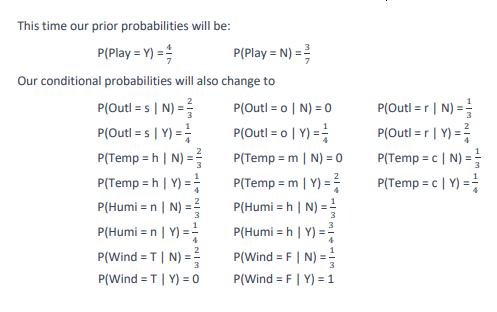

And then:
- P(N|G) = 0.0042
- P(Y|G) = 0.0038

Instance G will still be classified as N with probability of 0.0042 but it doesn’t pass our confidentiality threshold (0.01) and therefor our self-training algorithm stops in this stage.

## 5. What is the main assumption of self-training? What is the main assumption of Active Learning?

The main assumption of self-training is that **similar instances are likely to have the same label**. That’s why we find the most similar instances to our labelled data and if the similarity is certain enough (better than our defined threshold) we will give them the same label and add them to the cluster.

In Active learning, we assume that instances **near class boundaries are the most informative for learning.** That’s why we find the instances that we are most uncertain about (using different methods such as QBC or Uncertainty Sampling) and send them to the human annotator (Oracle). The assumption here is that having these instances correct label would be most beneficial for forming the correct clusters.